<a href="https://colab.research.google.com/github/leebaeho/webCrawling/blob/main/web_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%shell
!sudo apt -y update
!sudo apt install -y wget curl unzip
!wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
!dpkg -i libu2f-udev_1.1.4-1_all.deb
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION='curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE'
!wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
!unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
!chmod +x /tmp/chromedriver
!mv /tmp/chromedriver /usr/local/bin/chromedriver
!pip install selenium

In [ ]:
!pip install chromedriver-autoinstaller
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import time
import pandas as pd
from selenium import webdriver
import chromedriver_autoinstaller # setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage') # set path to chromedriver as per your configuration
chromedriver_autoinstaller.install() # set the target URL
url = "put-url-here-to-scrape" # set up the webdriver
driver = webdriver.Chrome(options=chrome_options)
#######################################################
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time

In [ ]:
import requests
from bs4 import BeautifulSoup
import bs4.element
import datetime

In [ ]:
name=['삼성 냉장고 프리미엄']
category=['별점']

#LG 냉장고 프리미엄:LG전자 오브제컬렉션 4도어 875L 네이처 화이트 (M873MWW031) 최저 2,200,000원
#ns_address="https://search.shopping.naver.com/catalog/32772464625?query=%EB%83%89%EC%9E%A5%EA%B3%A0&NaPm=ct%3Dlnqt3274%7Cci%3D36e8754b21d1899eed393b306bdbbfeb527ecd73%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D5a6658cde22e0a2d944297b5fc0a317f1d3ab41c"
#LG 냉장고 보급형:LG전자 오브제컬렉션 2도어 832L 네이처 클레이핑크+네이처 베이지 (S834MKE10) 최저 1,119,030원
#ns_address="https://search.shopping.naver.com/catalog/32772464625?query=%EB%83%89%EC%9E%A5%EA%B3%A0&NaPm=ct%3Dlnqt3274%7Cci%3D36e8754b21d1899eed393b306bdbbfeb527ecd73%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D5a6658cde22e0a2d944297b5fc0a317f1d3ab41c"
#삼성 냉장고 프리미엄 :삼성전자 비스포크 4도어 868L 색상선택 (RF85C9141AP) 최저 2,299,000원
ns_address='https://search.shopping.naver.com/catalog/38697134620?query=%EB%83%89%EC%9E%A5%EA%B3%A0&NaPm=ct%3Dlnqsspig%7Cci%3D09a766f70f27b0fcb0ab5677fcf0e4b19d5576cd%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D2b061c630e187f4034ec34d4ebff3a02bdb29203'
#삼성 냉장고 보급형 : 삼성전자 삼성 2도어 846L 스노우 화이트 (RS84B5041WW) 최저 1,019,000원
#ns_address='https://search.shopping.naver.com/catalog/34793800618?query=%EB%83%89%EC%9E%A5%EA%B3%A0&NaPm=ct%3Dlnqsvx94%7Cci%3D2b067a1b576e523aca88fea88fa3910b4e0de283%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D484b756c10de1bf993c0c455f6c3b1be00fd3e9d'
#캐리어 보급형: 캐리어 클라윈드 피트인 CRF-SN565MDC 최저632,040원
#ns_address='https://search.shopping.naver.com/catalog/21277559629?query=%EB%83%89%EC%9E%A5%EA%B3%A0&NaPm=ct%3Dlnqsipy0%7Cci%3De686839542d5851ab5dba078f287b1981f24ccd7%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D978b11f8f859fec0fe68dab5b03006bc99088b06'

#xpath
shoppingmall_review="/html/body/div/div/div[2]/div[2]/div[2]/div[3]/div[6]/ul"

header = {'User-Agent': ''}
driver.implicitly_wait(3)
driver.get(ns_address)
req = requests.get(ns_address,verify=False)
html = req.text
soup = BeautifulSoup(html, "html.parser")
time.sleep(2)

#쇼핑몰 리뷰 보기
#driver.find_element(shoppingmall_review).click()
driver.find_element(By.XPATH, shoppingmall_review).click()
time.sleep(2)

#element=driver.find_element(shoppingmall_review)
element=driver.find_element(By.XPATH,shoppingmall_review)
driver.execute_script("arguments[0].click();", element)
time.sleep(2)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.shopping.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
def add_dataframe(name,category,reviews,stars,cnt):  #데이터 프레임에 저장
    #데이터 프레임생성
    df1=pd.DataFrame(columns=['type','category','review','star'])
    n=1
    if (cnt>0):
        for i in range(0,cnt-1):
            df1.loc[n]=[name,category,reviews[i],stars[i]] #해당 행에 저장
            i+=1
            n+=1
    else:
        df1.loc[n]=[name,category,'null','null']
        n+=1
    return df1

In [ ]:
# 리뷰 가져오기
driver.find_element(By.XPATH,shoppingmall_review).click() #스크롤 건드리면 안됨
name_=name[0]
category_=category[0]
reviews=[]
stars=[]
cnt=1   #리뷰index
page=1

In [ ]:
while True:
    j=1
    print ("페이지", page ,"\n")
    time.sleep(2)
    while True: #한페이지에 20개의 리뷰, 마지막 리뷰에서 error발생
        try:
            star=driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[2]/div[2]/div[3]/div[6]/ul/li[1]/div[1]/span[1]').text
            stars.append(star)
            review=driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[2]/div[2]/div[3]/div[6]/ul/li['+str(j)+']/div[2]/div[1]').text
            reviews.append(review)
            if j%2==0: #화면에 2개씩 보이도록 스크롤
                ELEMENT = driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[2]/div[2]/div[3]/div[6]/ul/li['+str(j)+']/div[2]/div[1]')
                driver.execute_script("arguments[0].scrollIntoView(true);", ELEMENT)
            j+=1
            print(cnt, review ,star, "\n")
            cnt+=1
            if cnt > 3:
              break
        except: break

    time.sleep(2)

    if page<5:#page10
        try: #리뷰의 마지막 페이지에서 error발생
            page +=1
            next_page=driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[2]/div[2]/div[3]/div[6]/div[3]/a['+str(page)+']').click()

        except: break #리뷰의 마지막 페이지에서 process 종료
    else:
        try: #page11부터
            page+=1
            if page%10==0: next_page=driver.find_element(By.XPATH,'/html/body/div/div/div[2]/div[2]/div[2]/div[3]/div[6]/div[3]/a[11]').click()
            else : next_page=driver.find_element(By.XPATH, '/html/body/div/div/div[2]/div[2]/div[2]/div[3]/div[6]/div[3]/a['+str(page%10+2)+']').click()

            if page>5:
              break
        except: break


df4=add_dataframe(name_,category_,reviews,stars,cnt)
#save()

페이지 1 

1 엄마 집 냉장고 바꿔드렸어요! 10년 넘게 쓰던 냉장고 A/S 불렀더니 부품 보유 기간 8년이 지나 부품이 없어 수리를 못한다고 하더라구요 그 이후로 냉장실 냉기도 많이 약해져 이
엄마 집 냉장고 바꿔드렸어요! 10년 넘게 쓰던 냉장고 A/S 불렀더니 부품 보유 기간 8년이 지나 부품이 없어 수리를 못한다고 하더라구요 그 이후로 냉장실 냉기도 많이 약해져 이대로는 더 못 쓰지 싶어 바꿔드렸어요

설치하고 냉장고 왼쪽 문에 붙어있는 프랜치도어라는 부품이 원활하게 움직이지 않아 걱정했는데 서비스센터 불러 바로 해결했어요! 설치 기사님이 잘못 설치를 하셨다고 하네용ㅎㅎ

원래 쓰던 것 보다 용량도 많이 커졌고 디자인은 말해뭐해 너무 예쁘네용 새틴이랑 코타 고민하다 새틴이 지문 자국등 관리가 힘들다고 해서 코타화이트로 했는데 은은한 펄이 들어있어 더 마음에 들어 하시네용

코타화이트 쨍한 화이트는 아니에요 조명따라 좀 어두워보일 수는 있는데 두루두루 잘 어울릴 색감이에요!

5년전에 신혼살림으로 장만한 저희집 냉장고도 바꾸고싶네요! 평점5 

2 부모님댁에 15년 쓴 삼성지펠냉장고가 고장나기 시작해서 바꾸게 되었어요.어머니가 삼성 가전에 신뢰가 있으셔서 아묻따 이번에도 삼성으로 택했습니다.오프라인 매장 몇 군데를 돌아다니며
부모님댁에 15년 쓴 삼성지펠냉장고가 고장나기 시작해서 바꾸게 되었어요.
어머니가 삼성 가전에 신뢰가 있으셔서 아묻따 이번에도 삼성으로 택했습니다.
오프라인 매장 몇 군데를 돌아다니며 견적을 내봤는데 저희가 딱 원하는 기능이 있는 이 모델은
행사 외 제품이어서 가격이 안 맞거나 아예 취급을 안 하거나 그렇더라고요.
사실 온라인으로 대형가전 주문은 좀 꺼렸는데 이 모델을 구입하는 방법이 온라인삼성스토어 혹은 여기 문성전자밖에 없었어요.
문성전자가 가격 혜택이 더 좋고, .

삼성로지텍 전문 배송 기사분들 친절하시고 정말 전문적인 .
지정일에 약속시간도 딱 맞춰 오셔서 밖으로 꺼내놓은 식재료들 상할일이 없었네요.

저흰 도어 상,하 

In [ ]:
df4.head()

,type,category,review,star
1,삼성 냉장고 프리미엄,별점,엄마 집 냉장고 바꿔드렸어요! 10년 넘게 쓰던 냉장고 A/S 불렀더니 부품 보유 ...,평점5
2,삼성 냉장고 프리미엄,별점,부모님댁에 15년 쓴 삼성지펠냉장고가 고장나기 시작해서 바꾸게 되었어요.어머니가 삼...,평점5
3,삼성 냉장고 프리미엄,별점,비스포크 냉장고\n엄마집 냉장고가 사용한지 오래됐기도했고(삼성냉장고17년 썼습니다)...,평점5
4,삼성 냉장고 프리미엄,별점,최고예요\n전자제품은 삼성만 쓰고 있는데 15년이나 쓴 냉장고가 수명이 다해 새 냉...,평점5
5,삼성 냉장고 프리미엄,별점,삼성제품 애용자인데 이번에 냉장고를 큰맘먹고 23년식 비스포크로 주문했...\n삼성...,평점5


In [ ]:
df = df4[['star','review']]

In [ ]:
df.head()

,star,review
1,평점5,엄마 집 냉장고 바꿔드렸어요! 10년 넘게 쓰던 냉장고 A/S 불렀더니 부품 보유 ...
2,평점5,부모님댁에 15년 쓴 삼성지펠냉장고가 고장나기 시작해서 바꾸게 되었어요.어머니가 삼...
3,평점5,비스포크 냉장고\n엄마집 냉장고가 사용한지 오래됐기도했고(삼성냉장고17년 썼습니다)...
4,평점5,최고예요\n전자제품은 삼성만 쓰고 있는데 15년이나 쓴 냉장고가 수명이 다해 새 냉...
5,평점5,삼성제품 애용자인데 이번에 냉장고를 큰맘먹고 23년식 비스포크로 주문했...\n삼성...


In [ ]:
# '평점' 칼럼에서 '평점' 문자열 제거
df['star'] = df['star'].str.replace('평점', '')

# '평점' 칼럼의 타입을 int로 변경
df['star'] = df['star'].astype(int)

<ipython-input-18-d0d25b0cfdaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['star'] = df['star'].str.replace('평점', '')
<ipython-input-18-d0d25b0cfdaf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['star'] = df['star'].astype(int)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


네이버 쇼핑 리뷰 워드클라우드

In [ ]:
# 데이터프레임을 csv 파일로 저장
df.to_csv('/content/gdrive/MyDrive/samsung.csv', index=False)

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd # 판다스
import numpy as np # 넘파이
import matplotlib.pyplot as plt # 맷플롯립
from konlpy.tag import Okt # 형태소 분석기 Okt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
print(df['review'].nunique())

7


In [ ]:
# 중복 샘플 제거
df.drop_duplicates(subset=['review'], inplace=True)
df

<ipython-input-22-f4e8887effec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['review'], inplace=True)


,star,review
1,5,엄마 집 냉장고 바꿔드렸어요! 10년 넘게 쓰던 냉장고 A/S 불렀더니 부품 보유 ...
2,5,부모님댁에 15년 쓴 삼성지펠냉장고가 고장나기 시작해서 바꾸게 되었어요.어머니가 삼...
3,5,비스포크 냉장고\n엄마집 냉장고가 사용한지 오래됐기도했고(삼성냉장고17년 썼습니다)...
4,5,최고예요\n전자제품은 삼성만 쓰고 있는데 15년이나 쓴 냉장고가 수명이 다해 새 냉...
5,5,삼성제품 애용자인데 이번에 냉장고를 큰맘먹고 23년식 비스포크로 주문했...\n삼성...
6,4,좋아요\n온라인으로 처음 가전제품 구매하는거라 많이 고민했는데 괜한 고민이였네요. ...
7,5,최고예요\n이사하면서 건조기만 바꿀까하다 싹 깔맞춤했네요완전 대만족 너무이쁩니다. ...


In [ ]:
tokenizer = Okt()
df['tokenized'] = df['review'].apply(tokenizer.nouns)

<ipython-input-23-92b8db3561be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = df['review'].apply(tokenizer.nouns)


In [ ]:
df['label'] = np.select([df.star > 3], [1], default=0)
df.head()

,star,review,tokenized,label
1,5,엄마 집 냉장고 바꿔드렸어요! 10년 넘게 쓰던 냉장고 A/S 불렀더니 부품 보유 ...,"[엄마, 집, 냉장고, 냉장고, 부품, 보유, 기간, 지나, 부품, 수리, 그, 이...",1
2,5,부모님댁에 15년 쓴 삼성지펠냉장고가 고장나기 시작해서 바꾸게 되었어요.어머니가 삼...,"[부모님, 댁, 삼성, 펠, 냉장고, 고장, 나기, 시작, 어머니, 삼성, 가전, ...",1
3,5,비스포크 냉장고\n엄마집 냉장고가 사용한지 오래됐기도했고(삼성냉장고17년 썼습니다)...,"[비, 스포크, 냉장고, 엄마, 집, 냉장고, 사용, 한지, 기도, 삼성, 냉장고,...",1
4,5,최고예요\n전자제품은 삼성만 쓰고 있는데 15년이나 쓴 냉장고가 수명이 다해 새 냉...,"[최고, 전자제품, 삼성, 냉장고, 수명, 다해, 새, 냉장고, 중, 가격, 기능,...",1
5,5,삼성제품 애용자인데 이번에 냉장고를 큰맘먹고 23년식 비스포크로 주문했...\n삼성...,"[삼성, 제품, 애용, 이번, 냉장고, 맘, 비, 스포크, 주문, 삼성, 제품, 애...",1


In [ ]:
positive_reviews = np.hstack(df[df['label']==1]['tokenized'].values)
#negative_reviews = np.hstack(df[df['label']==0]['tokenized'].values)

In [ ]:
positive_reviews

array(['엄마', '집', '냉장고', '냉장고', '부품', '보유', '기간', '지나', '부품', '수리', '그',
       '이후', '냉장', '실', '냉기', '이', '엄마', '집', '냉장고', '냉장고', '부품', '보유',
       '기간', '지나', '부품', '수리', '그', '이후', '냉장', '실', '냉기', '이대', '더', '못',
       '설치', '냉장고', '왼쪽', '문', '프랜', '치도', '부품', '움직', '걱정', '서비스', '센터',
       '바로', '해결', '설치', '기사', '잘못', '설치', '원래', '것', '용량', '디자인', '말',
       '뭐해', '용', '새틴', '코타', '고민', '새틴', '지문', '자국', '등', '관리', '코타',
       '화이트', '펄', '더', '마음', '용', '코타', '화이트', '쨍', '화이트', '조명', '좀',
       '수', '두루', '두루', '색감', '신혼', '살림', '장만', '집', '냉장고', '부모님', '댁',
       '삼성', '펠', '냉장고', '고장', '나기', '시작', '어머니', '삼성', '가전', '신뢰', '이번',
       '삼성', '택', '오프라인', '매장', '몇', '군데', '부모님', '댁', '삼성', '펠', '냉장고',
       '고장', '나기', '시작', '어머니', '삼성', '가전', '신뢰', '이번', '삼성', '택', '오프라인',
       '매장', '몇', '군데', '견적', '내', '저희', '기능', '이', '모델', '행사', '외', '제품',
       '가격', '안', '아예', '취급', '안', '거나', '사실', '온라인', '대형', '가전', '주문',
       '좀', '이', '모델', '구입', '방법', '온라인', '삼성', '스토

In [ ]:
positive_reviews_word_count = Counter(positive_reviews)
print(positive_reviews_word_count.most_common(20))

[('냉장고', 20), ('삼성', 16), ('설치', 8), ('집', 7), ('화이트', 7), ('가전', 7), ('이번', 6), ('배송', 6), ('엄마', 5), ('부품', 5), ('기사', 5), ('코타', 5), ('가격', 5), ('이', 4), ('더', 4), ('서비스', 4), ('새틴', 4), ('고민', 4), ('주문', 4), ('전자', 4)]


In [ ]:
type(positive_reviews_word_count)

collections.Counter

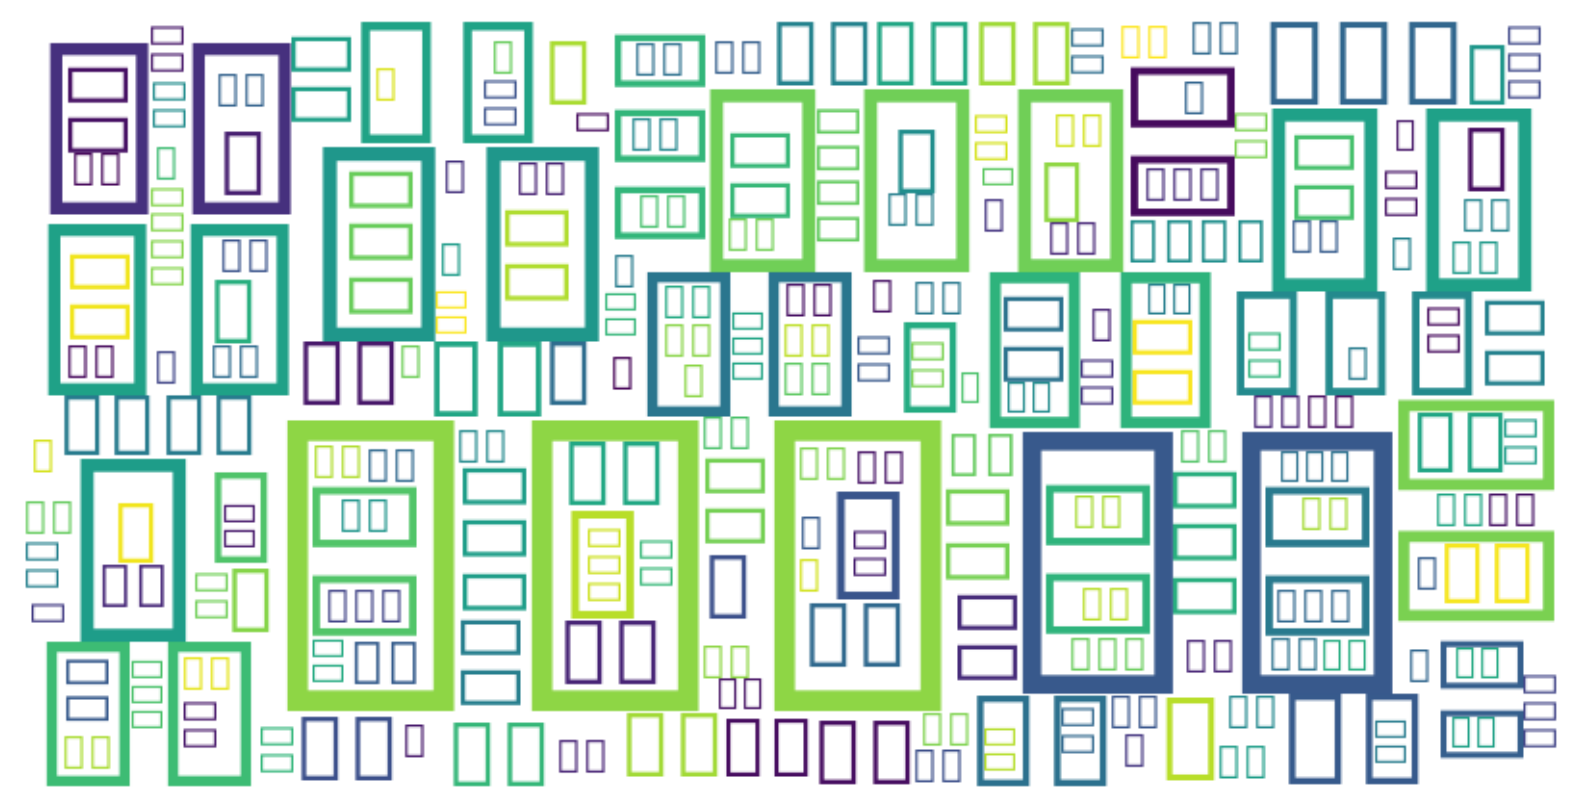

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(positive_reviews_word_count)

# Displaying the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

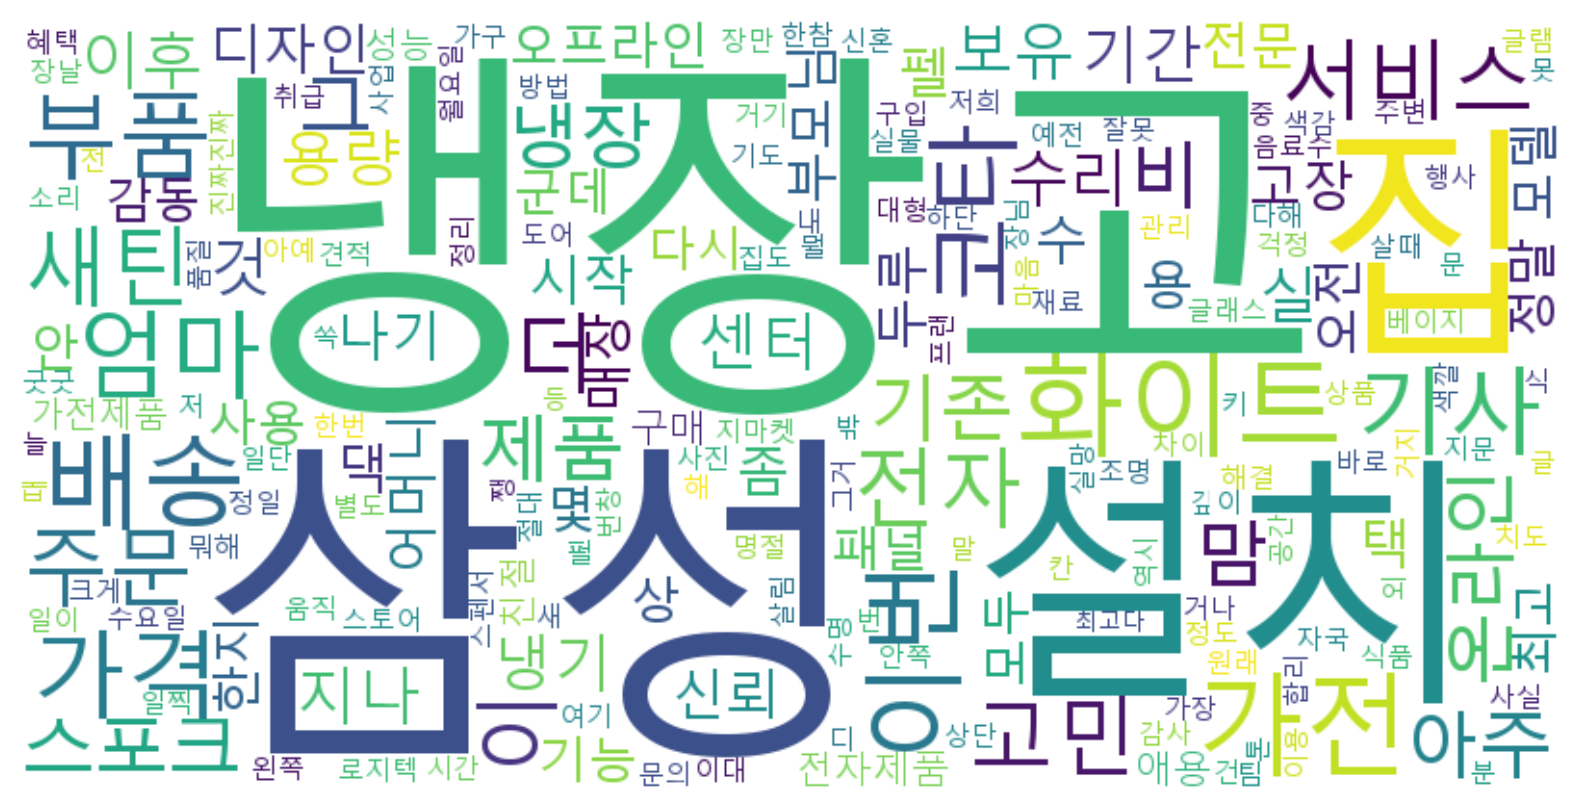

In [ ]:
# Path to the uploaded font file
font_path = '/content/gdrive/MyDrive/malgun.ttf'

# Creating a WordCloud object with the specified font path
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, font_path=font_path).generate_from_frequencies(positive_reviews_word_count)

# Displaying the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()